In [18]:
import sys; sys.path.insert(0, '..')

import gym
import sys
import torch
import tester
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, Javascript

import pytorch_drl.models.ppo_models as models

from pytorch_drl.algs.ppo import PPO

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
device =torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda:0


## 1. Define Utils:

### 1.1 Plotting:

In [20]:
def mean_filter(arr, filter_len):
    arr = np.concatenate([[0]*(filter_len-1), arr])
    filter_arr = np.ones(filter_len)/filter_len
    arr = arr
    output = list()
    for i in range(filter_len-1, len(arr)):
        conv = np.sum(filter_arr * arr[i-filter_len+1:i+1])
        output.append(conv)
    return output

def plot(scores, n=None):
    if n is not None:
        scores = mean_filter(scores, n)
    clear_output(True)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode')
    plt.show()

## 2. Create environment

In [9]:
env_name = "LunarLander-v2"
env_name = "CartPole-v0"
env = gym.make(env_name)
env.seed(0)

state_size =  env.observation_space.shape[0]
action_size = env.action_space.n

print("State size:", state_size, "\nAction size:", action_size)

State size: 4 
Action size: 2


/home/selo/Envs/ml-agent_/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


## 4. PPO Test

/home/selo/Envs/ml-agent_/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Avg scorecore: 195.16 i: 355                   Solved! Episode 355


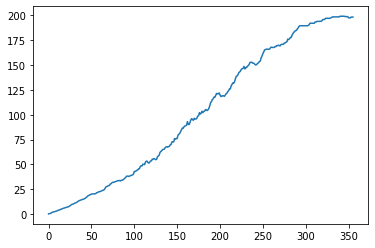

Process Process-24:
Process Process-18:
Process Process-20:
Process Process-19:
Process Process-21:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/selo/anaconda3/envs/ml-agents/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/selo/anaconda3/envs/ml-agents/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Process Process-22:
Process Process-17:
Process Process-23:
  File "/home/selo/anaconda3/envs/ml-agents/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/selo/anaconda3/envs/ml-agents/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/selo/anaconda3/envs/ml-agents/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/hom

In [12]:
tmax = 200
n_traj = 2000

n_env = 8
epochs = 4
batch_size = 16 * n_env #tmax * n_env // 4    #32

ppo_model = models.PPOPolicyNetwork(state_size, action_size)
# init agent:
agent = PPO(ppo_model,
            env_name,
            n_env=n_env,
            epochs=epochs,
            lr=1e-4,
            critic_coef=0.5,
            normalize_rewards=False,
            max_grad_norm=0.5,
            mini_batch_size=batch_size,
            device="cpu"
            )
# train the agent
scores, losses = agent.train(tmax, n_traj,  env)

# plot the training:
x = np.arange(len(scores))
scores = mean_filter(scores, 50)
#losses = mean_filter(losses, 50)
plt.plot(x, scores, label = "scores")
#plt.plot(x, losses, label = "losses")
#plt.legend()
plt.show()

### 4.1 Trained Agent Demonstration

In [14]:
tester.test_agent(agent, env, max_t=200, render=True, num_of_episodes=5, log=True)

200.0
200.0
200.0
200.0
200.0


200.0

### Save Trajectory

In [15]:
trajectories = agent.save_trajectories(300_000//n_env, "experts/ppo_{}".format(env_name), action_size)

37450 / 37500                                  

## 5. PPO Continuous Test


### 5.1 Trained Agent Demonstration